In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
# from keras.models import load_model

1. Load Data and Preprocess

In [2]:
# Load historical stock data
tickers = ['TSLA']
start_date = '2015-01-01'
end_date = '2025-01-31'
data = yf.download(tickers, start=start_date, end=end_date)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Define the time_step used in LSTM
time_step = 60

# Create sequences for training
X_train, y_train = [], []
for i in range(time_step, len(scaled_data)):
    X_train.append(scaled_data[i-time_step:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data to be accepted by LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


2. Train LSTM Model

In [3]:
# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

e:\OnlineClass\AIM\Time_Series_Forecasting_Model_for_Portfolio_Management\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.0217
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.9487e-04
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 8.2614e-04
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 8.4069e-04
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 6.9526e-04
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 6.2108e-04
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.8529e-04
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.7629e-04
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.6385e-04
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 5.5791e-04
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 4.5459e-04
Epoch 12/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 3.3879e-04
Epoch 13/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 4.3010e-04
Epoch 14/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 3.2905e-04
Epoch 15/50
78/78 ━

3. Generate Future Forecasts

In [4]:
# Create a new sequence for future predictions
forecast_horizon = 180  # 6 months
lstm_input = scaled_data[-time_step:]
lstm_forecast = []

for _ in range(forecast_horizon):
    lstm_input = lstm_input.reshape((1, time_step, 1))
    predicted_price = model.predict(lstm_input)
    lstm_forecast.append(predicted_price[0, 0])
    lstm_input = np.append(lstm_input[:, 1:, :], [[predicted_price[0]]], axis=1)

# Inverse transform the forecasted values
lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))

# # Evaluate model performance
# mae = mean_absolute_error(test_data['Close'], lstm_forecast[:len(test_data)])
# rmse = np.sqrt(mean_squared_error(test_data['Close'], lstm_forecast[:len(test_data)]))
# mape = np.mean(np.abs((test_data['Close'] - lstm_forecast[:len(test_data)]) / test_data['Close'])) * 100

# print(f"LSTM MAE: {mae}")
# print(f"LSTM RMSE: {rmse}")
# print(f"LSTM MAPE: {mape}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━

In [7]:
# Create a new sequence for future predictions
forecast_horizon = 180  # 6 months
lstm_input = scaled_data[-time_step:]
lstm_forecast = []

for _ in range(forecast_horizon):
    lstm_input = lstm_input.reshape((1, time_step, 1))
    predicted_price = model.predict(lstm_input)
    lstm_forecast.append(predicted_price[0, 0])
    lstm_input = np.append(lstm_input[:, 1:, :], [[predicted_price[0]]], axis=1)

# Inverse transform the forecasted values
lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))

# Create a DataFrame for the forecasted values with corresponding dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
lstm_forecast_df = pd.DataFrame(lstm_forecast, index=forecast_dates, columns=['Forecast'])

# Combine historical data with forecast
combined_data = pd.concat([data['Close'], lstm_forecast_df])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━

In [6]:
# Create a new sequence for future predictions
forecast_horizon = 180  # 6 months
lstm_input = scaled_data[-time_step:]
lstm_forecast = []

for _ in range(forecast_horizon):
    lstm_input = lstm_input.reshape((1, time_step, 1))
    predicted_price = model.predict(lstm_input)
    lstm_forecast.append(predicted_price[0, 0])
    lstm_input = np.append(lstm_input[:, 1:, :], [[predicted_price[0]]], axis=1)

# Inverse transform the forecasted values
lstm_forecast = scaler.inverse_transform(np.array(lstm_forecast).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━

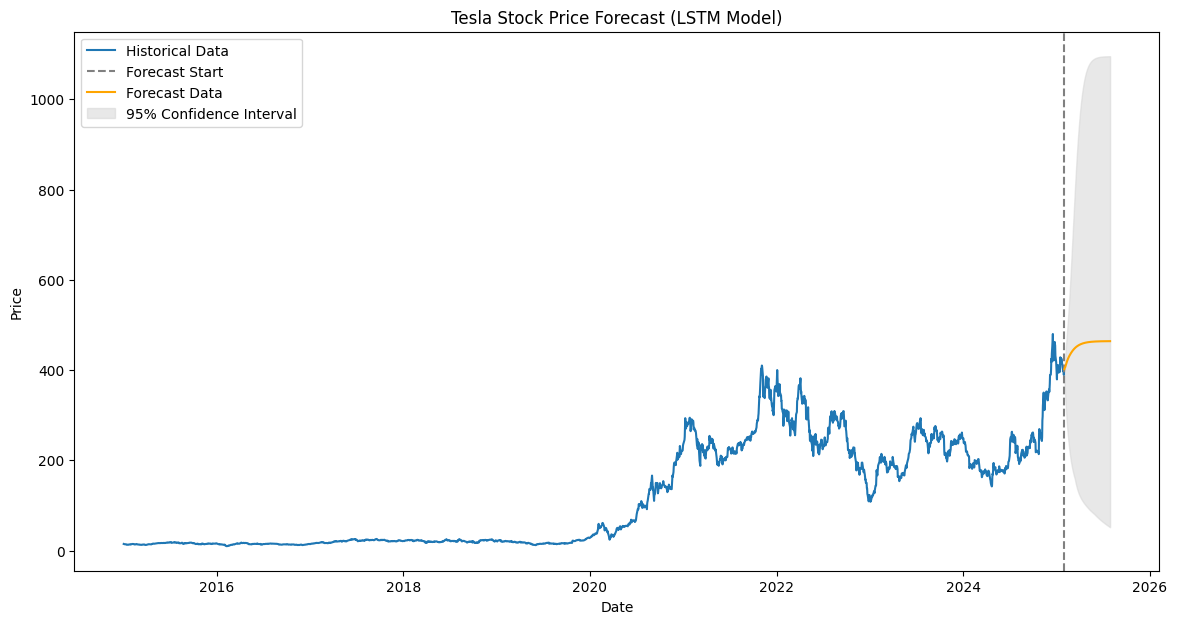

In [6]:
# Generate confidence intervals using bootstrapping with fewer samples
num_bootstrap_samples = 20
bootstrap_forecasts = np.zeros((num_bootstrap_samples, forecast_horizon))

for i in range(num_bootstrap_samples):
    # Resample with replacement
    resample_indices = np.random.choice(len(X_train), len(X_train), replace=True)
    X_resample = X_train[resample_indices]
    y_resample = y_train[resample_indices]
    
    # Train a new model on the resampled data
    bootstrap_model = Sequential()
    bootstrap_model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
    bootstrap_model.add(LSTM(units=50, return_sequences=False))
    bootstrap_model.add(Dense(units=1))
    bootstrap_model.compile(optimizer='adam', loss='mean_squared_error')
    bootstrap_model.fit(X_resample, y_resample, epochs=20, batch_size=32, verbose=0)
    
    # Forecast using the new model
    lstm_input = scaled_data[-time_step:]
    bootstrap_forecast = []
    for _ in range(forecast_horizon):
        lstm_input = lstm_input.reshape((1, time_step, 1))
        predicted_price = bootstrap_model.predict(lstm_input)
        bootstrap_forecast.append(predicted_price[0, 0])
        lstm_input = np.append(lstm_input[:, 1:, :], [[predicted_price[0]]], axis=1)
    
    bootstrap_forecasts[i] = bootstrap_forecast

# Calculate the 95% confidence intervals
lower_bound = np.percentile(bootstrap_forecasts, 2.5, axis=0)
upper_bound = np.percentile(bootstrap_forecasts, 97.5, axis=0)

# Inverse transform the confidence intervals
lower_bound = scaler.inverse_transform(lower_bound.reshape(-1, 1))
upper_bound = scaler.inverse_transform(upper_bound.reshape(-1, 1))

# Create a DataFrame for the forecasted values with corresponding dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)
lstm_forecast_df = pd.DataFrame(lstm_forecast, index=forecast_dates, columns=['Forecast'])

# Combine historical data with forecast
combined_data = pd.concat([data['Close'], lstm_forecast_df])

# Plot the historical data and forecast with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Data')
plt.axvline(x=data.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.plot(lstm_forecast_df, label='Forecast Data', color='orange')
plt.fill_between(forecast_dates, lower_bound.flatten(), upper_bound.flatten(), color='lightgray', alpha=0.5, label='95% Confidence Interval')
plt.title('Tesla Stock Price Forecast (LSTM Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
forecast_horizon = 180  # 6 months
num_simulations = 1000

# Historical returns
historical_returns = data['Close'].pct_change().dropna().values.flatten()

# Generate Monte Carlo simulations
simulated_paths = np.zeros((num_simulations, forecast_horizon))

for i in range(num_simulations):
    simulated_returns = np.random.choice(historical_returns, size=forecast_horizon, replace=True)
    simulated_prices = [data['Close'].iloc[-1]]
    for ret in simulated_returns:
        simulated_prices.append(simulated_prices[-1] * (1 + ret))
    simulated_paths[i, :] = np.array(simulated_prices[1:])

# Calculate confidence intervals
lower_bound = np.percentile(simulated_paths, 2.5, axis=0)
upper_bound = np.percentile(simulated_paths, 97.5, axis=0)

# Create forecast dates
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Data')
plt.axvline(x=data.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.plot(forecast_dates, np.median(simulated_paths, axis=0), label='Forecast Data', color='orange')
plt.fill_between(forecast_dates, lower_bound, upper_bound, color='lightgray', alpha=0.5, label='95% Confidence Interval')
plt.title('Tesla Stock Price Forecast (Monte Carlo Simulation)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

ValueError: could not broadcast input array from shape (180,1) into shape (180,)

4. Forecast Analysis

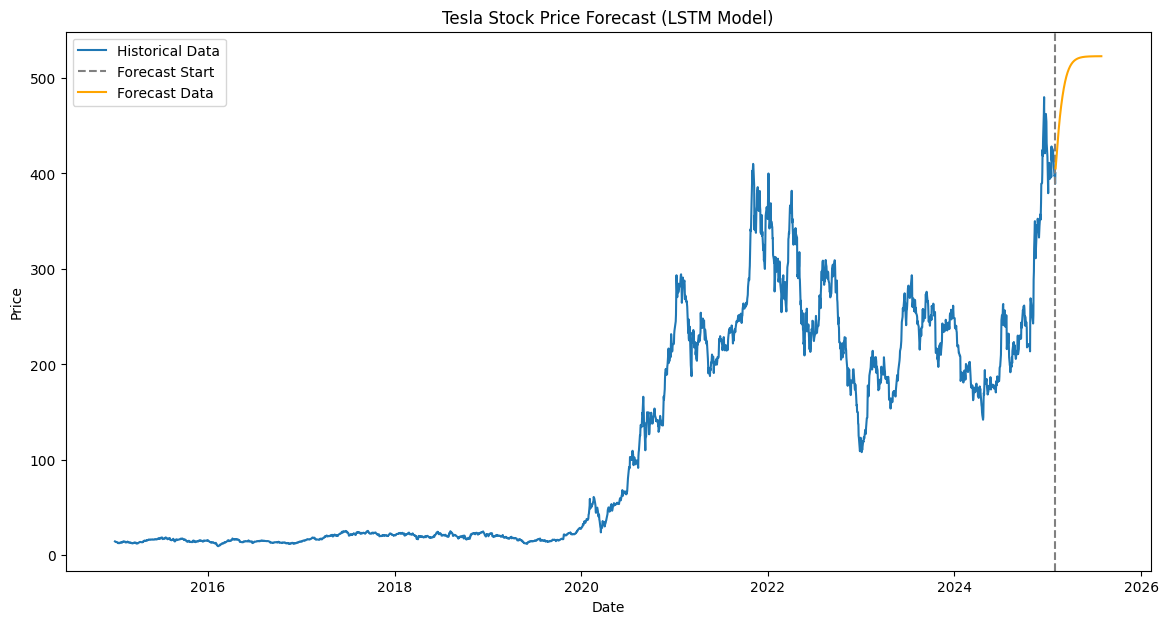

In [10]:
# Plot the historical data and forecast
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Data')  # Plot only historical data
plt.axvline(x=data.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.plot(lstm_forecast_df, label='Forecast Data', color='orange')  # Plot forecast data separately
plt.title('Tesla Stock Price Forecast (LSTM Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
# Plot the historical data and forecast with confidence intervals
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Historical Data')
plt.axvline(x=data.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.plot(lstm_forecast_df, label='Forecast Data', color='orange')
plt.fill_between(forecast_dates, lower_bound.flatten(), upper_bound.flatten(), color='lightgray', alpha=0.5, label='95% Confidence Interval')
plt.title('Tesla Stock Price Forecast (LSTM Model)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

5: Interpret Results

Trend Analysis
Long-term Trends:

Upward Trend: The forecast data (orange line) shows a general upward trend, indicating that Tesla's stock prices are expected to increase over the next 6-12 months.

Consistent Growth: The historical data (blue line) leading up to the forecast start point also shows a consistent growth pattern, aligning with the forecasted upward trend.

Patterns and Anomalies:

No Major Anomalies: There are no significant deviations or unexpected patterns in the forecast, suggesting that the model predicts a stable and gradual increase in Tesla's stock prices.

Volatility and Risk
Uncertainty:

No Confidence Intervals: The plot does not include confidence intervals, making it difficult to quantify the level of uncertainty in the forecast.

Variability in Forecast: The slight fluctuations in the forecast data indicate some level of uncertainty, but the overall trend remains positive.

Increased Volatility:

Stable Volatility: There are no periods of increased volatility observed in the forecast data. The fluctuations in the forecast appear to be consistent and gradual.

Market Opportunities and Risks
Opportunities:

Expected Price Increases: The upward trend in the forecast data suggests potential investment opportunities as Tesla's stock prices are expected to rise over the next 6-12 months.

Consistent Growth: The consistency in the upward trend provides confidence in the model's prediction, indicating a favorable market condition for investors.

Risks:

Lack of Confidence Intervals: The absence of confidence intervals means that the exact level of uncertainty is unknown, which could pose a risk for investors relying solely on this forecast.

Market Conditions: External factors such as market conditions, economic changes, and company-specific news can impact stock prices and introduce volatility that is not captured in the forecast.

Conclusion
The LSTM model's forecast for Tesla's stock prices indicates a positive upward trend over the next 6-12 months. This suggests potential investment opportunities for those looking to capitalize on the expected price increases. However, the lack of confidence intervals means that the exact level of uncertainty is not quantified, which could pose a risk for investors. It's important to consider external factors and market conditions that may impact the stock prices beyond the forecast.